## Observations and Insights 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
mouse_study_df=pd.merge(study_results,mouse_metadata,how="outer",on="Mouse ID")
# Display the data table for preview
mouse_study_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
# Checking the number of mice.
micenum=mouse_study_df["Mouse ID"].nunique()
print(f"There are {micenum} unique mice.")

There are 249 unique mice.


In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,45.000000,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates=mouse_study_df[mouse_study_df.duplicated("Mouse ID",keep='last')]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1887,m601,20,34.255732,1,Capomulin,Male,22,17
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Using last keeps the last entry of the duplicates, giving the final data row of the test for that particular mouse.
final_test_result=mouse_study_df.drop_duplicates("Mouse ID",keep='last')
final_test_result


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1867,i557,45,47.685963,1,Capomulin,Female,1,24
1877,m957,45,33.329098,1,Capomulin,Female,3,19
1882,f966,20,30.485985,0,Capomulin,Male,16,17


In [24]:
# Checking the number of mice in the clean DataFrame.
micenum=final_test_result["Mouse ID"].nunique()
print(f"There are {micenum} unique mice when duplicates are removed.")

There are 249 unique mice.


## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
by_drug=final_test_result.groupby("Drug Regimen")
tumor_volume_mean=by_drug["Tumor Volume (mm3)"].mean()
tumor_volume_median=by_drug["Tumor Volume (mm3)"].median()
tumor_volume_var=by_drug["Tumor Volume (mm3)"].var()
tumor_volume_stdev=by_drug["Tumor Volume (mm3)"].std()
tumor_volume_sem=by_drug["Tumor Volume (mm3)"].sem()
regimen=by_drug["Drug Regimen"].count().keys()

Tumor_stats=pd.DataFrame({"Drug Regimen":regimen,"Mean Tumor Size":tumor_volume_mean,"Median Tumor Size":tumor_volume_median,"Variance of Tumor Size":tumor_volume_var,"Standard Dev of Tumors":tumor_volume_stdev,"Standard Error":tumor_volume_sem})
Tumor_stats

,Drug Regimen,Mean Tumor Size,Median Tumor Size,Variance of Tumor Size,Standard Dev of Tumors,Standard Error
Drug Regimen,,,,,,
Capomulin,Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
by_drug=final_test_result.groupby("Drug Regimen")
Tumor_stats=by_drug["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem','count'])
Tumor_stats

,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038,25
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114,25
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591,25
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184,25
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417,25
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934,25
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521,25
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308,25
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056,24


## Bar and Pie Charts

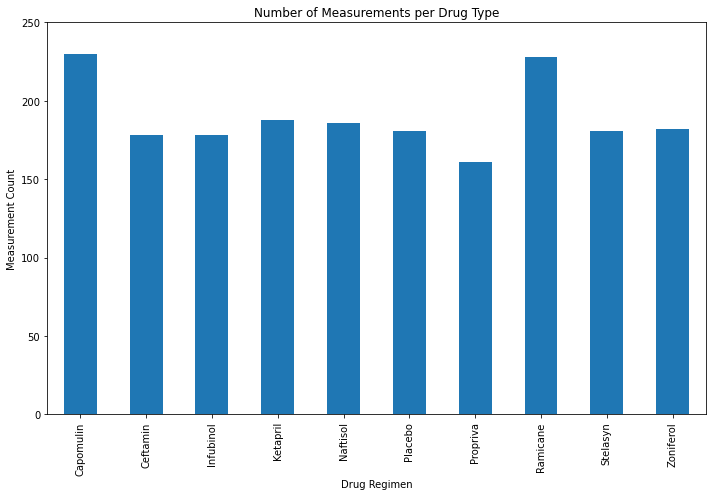

In [109]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
barplot=pd.DataFrame(mouse_study_df.groupby("Drug Regimen").count()["Sex"])
barplot=barplot.rename(columns={"Sex":"Number of Measurements"})
barplot.plot(kind="bar",figsize=(10,7),legend=False)
plt.title("Number of Measurements per Drug Type")
plt.ylabel("Measurement Count")
plt.yticks(range(0,251,50))
plt.tight_layout()
plt.show()

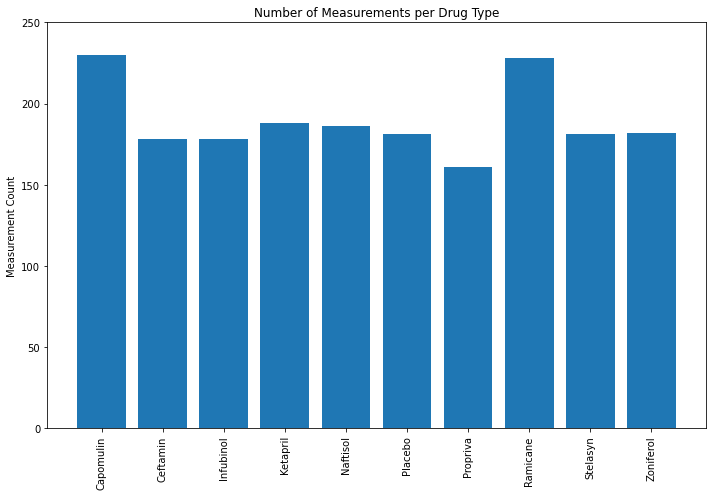

In [110]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
barplot=pd.DataFrame(mouse_study_df.groupby("Drug Regimen").count()["Sex"])
barplot=barplot.rename(columns={"Sex":"Number of Measurements"})
xax=barplot.iloc[:,0].keys()
yax=barplot["Number of Measurements"]
plt.figure(figsize=(10,7))
plt.bar(xax,yax)
plt.title("Number of Measurements per Drug Type")
plt.ylabel("Measurement Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.yticks(range(0,251,50))
plt.show()


Text(0.5, 1.0, 'Gender Proportion of Lab Rats')

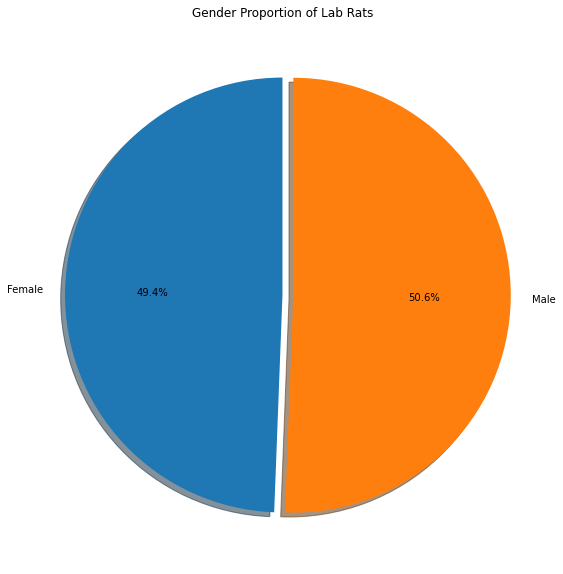

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pieplot=pd.DataFrame(mouse_study_df.groupby("Sex").count()["Drug Regimen"])
pieplot=pieplot.rename(columns={"Drug Regimen":"Number of Measurements"})
pieplot.plot(kind="pie",figsize=(10,10),legend=False,explode=[0,.05],shadow=True,startangle=90,subplots=True,autopct='%1.1f%%')
plt.xlabel("")
plt.ylabel("")
plt.title("Gender Proportion of Lab Rats")


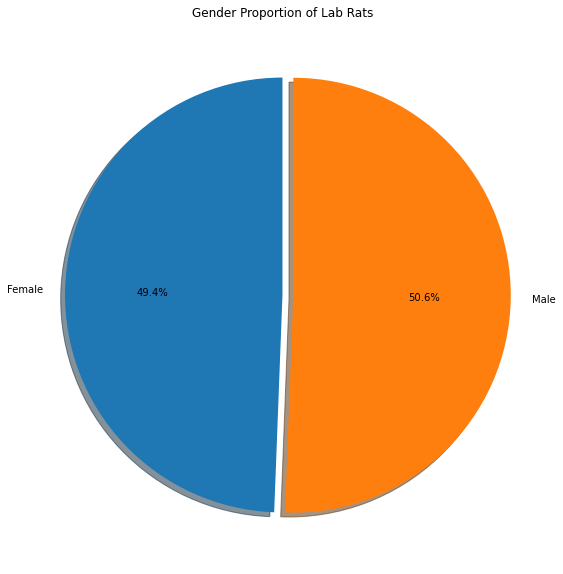

In [178]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pieplot=pd.DataFrame(mouse_study_df.groupby("Sex").count()["Drug Regimen"])
pieplot=pieplot.rename(columns={"Drug Regimen":"Number of Measurements"})
sizes=pieplot["Number of Measurements"]
labels=pieplot["Number of Measurements"].keys()
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=[0,0.05],labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Gender Proportion of Lab Rats")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
